# KNN--k nearest neighbors

KNN is a method to classify a new unlabled object based on a lot of labled objects. find K nearest neignbors for this new item (minimum distance : euclidean distance, manhaton distance or others.) here we say K=10, if 6 of neighbors are in class A and 4 of neighbors are in class B, we say the new unlabled object belongs to class B)

1) It is advisable to take odd values of k while using KNN classifier to avoid ties

2) There is no explicit training phase in KNN . It just takes data as input in its training phase . All the actual work , that is calculation of distances,comparisons and taking out nearest k neighbors is done at testing phase when test data is available. therefore,KNN does more computation on test time than on train time.

3) Need feature scaling before KNN

### knn parameter explaining 

1.n_neighbors：K in KNN. If K is small, it will cause overfitting. If K is large, we can't classify the unknown object. Generally we use the default value of 5.

2.weights：is used to determine the weights of neighbors. There are three ways: 

           (1)weights='uniform', which means that all neighbors have the same weight. 
           (2)Weights ='distance', means that the weight is the reciprocal of the distance, which is inversely   
              proportional to the distance. 
           (3)Custom function, you can customize the different distance corresponding to the weight. In most 
              cases you don't need to define your own function.

3.algorithm：Used to specify the method of calculating neighbors, it has four ways:

           (1)algorithm=auto, automatically select the appropriate algorithm according to the data, and select 
              auto by default; 
           (2)algorithm=kd_tree, also known as KD tree, is a data structure of multidimensional space to 
              facilitate the retrieval of key data.
           (3)algorithm=ball_tree, also known as spherical tree, which, like KD tree, is the data result of 
              multidimensional space. Unlike KD tree, spherical tree is more suitable for cases with large 
              dimensions.
           (4)algorithm=brute, also known as violent search, which differs from KD tree in that it adopts linear 
              scan instead of fast retrieval by constructing tree structure. When the training set is large, the 
              efficiency is low.

4.leaf_size：Represents the number of leaves when constructing KD tree or spherical tree. The default is 30. Adjusting leaf_size will affect the tree construction and search speed.

5.metric:'minkowski','euclidean','manhattan','chebyshev'


### knn using sklearn

In [1]:
from sklearn import datasets
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

In [2]:
dataset = datasets.load_breast_cancer()
dataset.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [3]:
X_train, X_test, Y_train, Y_test = train_test_split(dataset.data, dataset.target, test_size = 0.2, random_state = 0)

In [4]:
clf = KNeighborsClassifier()
clf.fit(X_train, Y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [5]:
clf.score(X_test, Y_test)

0.9385964912280702

### Cross validation

1. only use traing dataset to do cross validation, divide training dataset into k folds and use k-1 to train and 1 to test

2. For k cross validation,smaller k value implies less variance.

3. use of cross validation: selecting variabless to include in a model
                            comparing predictors
                            selecting parameters in predition model


In [7]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
cross_val_score(clf, dataset.data, dataset.target, cv = KFold(3, True, 0 ))

array([0.94736842, 0.90526316, 0.93121693])

4. find optimal K using training data and cross validation

In [11]:
x_axis = []
y_axis = []
for i in range(1, 26, 2):#2 is to ensure odd number of k
    clf = KNeighborsClassifier(n_neighbors = i)
    score = cross_val_score(clf, X_train, Y_train)
    x_axis.append(i)
    y_axis.append(score.mean())
    print(i,score.mean())

//anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


1 0.9274863483211341
3 0.9296648077146509
5 0.9252788428023702
7 0.9318723132334147
9 0.9318868362960381
11 0.9252788428023702
13 0.9230858603462297
15 0.9120628558150344
17 0.9120628558150344
19 0.9098553502962705
21 0.9142703613337981
23 0.916477866852562
25 0.9098843964215174


//anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


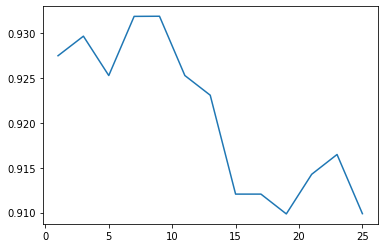

In [10]:
import matplotlib.pyplot as plt
plt.plot(x_axis, y_axis)
plt.show()

### Number of features

It is not that the more features the better the result in KNN, some features may be high correlative,to avoid bad results we need to:

1) assign weights to features:if two features are very similar even same, sign one with big weight and sign another a small weight

2) feature selection:backward elimination: compare the accuracy(with feature) with accuracy(without feature), if without one is higher then remove the feature.

### Handling category data

1) binary:0,1

2) label with natural order: high middel low-->2,1,0

2) more than 2 categories: dummy (make seperate columns with binary representing)

### Other algorithms for KNN

1) KD tree:

a. A KD Tree(also called as K-Dimensional Tree) is a binary search tree where data in each node is a K-Dimensional point in space. In short, it is a space partitioning data structure for organising points in a K-Dimensional space. It is used in Nearest Neighbours algorithm.

b. We try to cut the space (representation of features. 2D space if only 2 features are present in a data-point) into halves and then just do the search on one of the halves. As we do this for each node of the tree the height of the tree is O(log(n)). So, for searching, we will just need to traverse at most O(log(n)). This is similar to the case of Binary Search Tree.

2) ball tree

### Pros and Cons of using KNN


**Pros:**
    
1)easy to understand

2)multiclass classification works well

3)insensitive to outliers

4)versatile: usseful for classification and regression

**Cons:**

1)testing time is huge

2)if the training dataset split is inbalanced, the result is biased

3)high dimensionality reduces the score

4)high memory requirement

5)computationally expensive